<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Мини-вывод" data-toc-modified-id="Мини-вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Мини-вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Мини-вывод" data-toc-modified-id="Мини-вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Мини-вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Мини-вывод" data-toc-modified-id="Мини-вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Мини-вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [99]:
df = pd.read_csv('/datasets/Churn.csv')

In [100]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [102]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [103]:
df.duplicated().sum()

0

In [104]:
df.rename(columns={'RowNumber':'row_number', 'CustomerId':'customer_id', 'Surname':'surname', 'CreditScore':'credit_score', 'Geography':'geography',
       'Gender':'gender', 'Age':'age', 'Tenure':'tenure', 'Balance':'balance', 'NumOfProducts':'num_of_products', 'HasCrCard':'has_cr_card',
       'IsActiveMember':'is_active_member', 'EstimatedSalary':'estimated_salary', 'Exited':'exited'}, inplace=True)

In [105]:
df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [106]:
df.dropna(subset=['tenure'], inplace=True)
df['tenure'] = df['tenure'].astype('int64')
df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)

### Мини-вывод

На этапе подготовке данных для начала я импортировал данных.После просмотра понял,что: 1)следует привести столбцы к змеиному реестру; 2)пропуски в столбце tenure следует удалить и изменить тип данных; 3)следует удалить столбцы row_number, customer_id, surname, т.к они не пригодятся нам для дальнейшего анализа.

После проделанных действий мы можем переходить к исследованию задачи.

## Исследование задачи

In [107]:
gender_ohe = pd.get_dummies(df["gender"], drop_first=True)
country_ohe = pd.get_dummies(df["geography"], drop_first=True)
df.drop(["gender", "geography"], axis=1, inplace=True)
df_ohe = pd.concat([df, gender_ohe, country_ohe], axis=1)
features = df_ohe.drop(['exited'], axis = 1)
target = df_ohe['exited']
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345)

Здесь мы разбили данные в соотношении 3:1:1

In [109]:
display(f'Размер валидационной выборки: {features_valid.shape}')
display(f'Размер обучающей выборки: {features_train.shape}')
display(f'Размер тренировочной выборки: {features_test.shape}')

'Размер валидационной выборки: (1819, 11)'

'Размер обучающей выборки: (5454, 11)'

'Размер тренировочной выборки: (1818, 11)'

In [110]:
numeric = ['credit_score', 'age','tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [111]:
models = {'Логистическая регрессия' : LogisticRegression(solver = 'liblinear', random_state = 12345), 
              'Случайный лес': RandomForestClassifier(random_state = 12345), 
              'Решающее дерево': DecisionTreeClassifier(random_state = 12345)}

In [112]:
for name, model in models.items():
    model = model
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    display(f'{name} матрица ошибок: {confusion_matrix(target_valid, predicted_valid)}')
    display(f'{name} полнота: {recall_score(target_valid, predicted_valid)}')
    display(f'{name} точность: {precision_score(target_valid, predicted_valid)}')
    display(f'{name} F1-мера: {f1_score(target_valid, predicted_valid)}')
    display(f'{name} AUC-ROC: {roc_auc_score(target_valid, predicted_valid)}')

'Логистическая регрессия матрица ошибок: [[1427   41]\n [ 277   74]]'

'Логистическая регрессия полнота: 0.21082621082621084'

'Логистическая регрессия точность: 0.6434782608695652'

'Логистическая регрессия F1-мера: 0.3175965665236052'

'Логистическая регрессия AUC-ROC: 0.5914485277564296'

'Случайный лес матрица ошибок: [[1422   46]\n [ 192  159]]'

'Случайный лес полнота: 0.452991452991453'

'Случайный лес точность: 0.775609756097561'

'Случайный лес F1-мера: 0.5719424460431656'

'Случайный лес AUC-ROC: 0.7108281515638464'

'Решающее дерево матрица ошибок: [[1282  186]\n [ 170  181]]'

'Решающее дерево полнота: 0.5156695156695157'

'Решающее дерево точность: 0.49318801089918257'

'Решающее дерево F1-мера: 0.5041782729805013'

'Решающее дерево AUC-ROC: 0.6944832591971557'

### Мини-вывод
На этом этапе мы приводили данные в порядок.Для этого мы применили технику OHE, а также разделили данные на выборки в соотношении 3:1:1.После этого мы измерили значение F1-меры и AUC-ROC, и поняли, что размер F1-меры что во всех моделях не подходит нам,так что перейдем к борьбе с дисбалансом.

## Борьба с дисбалансом

In [113]:
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

    
    
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

display(features_upsampled.shape)
display(target_upsampled.shape)

(15588, 11)
(15588,)


In [124]:
for name, model in models.items():
    model = model
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    display(f'{name} матрица ошибок: {confusion_matrix(target_valid, predicted_valid)}')
    display(f'{name} полнота: {recall_score(target_valid, predicted_valid)}')
    display(f'{name} точность: {precision_score(target_valid, predicted_valid)}')
    display(f'{name} F1-мера: {f1_score(target_valid, predicted_valid)}')
    display(f'{name} AUC-ROC: {roc_auc_score(target_valid, predicted_valid)}')

'Логистическая регрессия матрица ошибок: [[511 957]\n [ 28 323]]'

'Логистическая регрессия полнота: 0.9202279202279202'

'Логистическая регрессия точность: 0.25234375'

'Логистическая регрессия F1-мера: 0.3960760269773145'

'Логистическая регрессия AUC-ROC: 0.6341602816398457'

'Случайный лес матрица ошибок: [[1370   98]\n [ 151  200]]'

'Случайный лес полнота: 0.5698005698005698'

'Случайный лес точность: 0.6711409395973155'

'Случайный лес F1-мера: 0.6163328197226502'

'Случайный лес AUC-ROC: 0.7515215383062794'

'Решающее дерево матрица ошибок: [[1271  197]\n [ 188  163]]'

'Решающее дерево полнота: 0.46438746438746437'

'Решающее дерево точность: 0.4527777777777778'

'Решающее дерево F1-мера: 0.45850914205344584'

'Решающее дерево AUC-ROC: 0.6650956395506804'

Лучший результат F1-меры показывает модель случайного леса.Результат равен 0,616

In [141]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

display(features_downsampled.shape)
display(target_downsampled.shape)

(1559, 11)

(1559,)

In [142]:
for name, model in models.items():
    model = model
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    display(f'{name} матрица ошибок: {confusion_matrix(target_valid, predicted_valid)}')
    display(f'{name} полнота: {recall_score(target_valid, predicted_valid)}')
    display(f'{name} точность: {precision_score(target_valid, predicted_valid)}')
    display(f'{name} F1-мера: {f1_score(target_valid, predicted_valid)}')
    display(f'{name} AUC-ROC: {roc_auc_score(target_valid, predicted_valid)}')

'Логистическая регрессия матрица ошибок: [[518 950]\n [ 28 323]]'

'Логистическая регрессия полнота: 0.9202279202279202'

'Логистическая регрессия точность: 0.2537313432835821'

'Логистическая регрессия F1-мера: 0.3977832512315271'

'Логистическая регрессия AUC-ROC: 0.6365444778251318'

'Случайный лес матрица ошибок: [[689 779]\n [ 25 326]]'

'Случайный лес полнота: 0.9287749287749287'

'Случайный лес точность: 0.29502262443438915'

'Случайный лес F1-мера: 0.44780219780219777'

'Случайный лес AUC-ROC: 0.6990604889106251'

'Решающее дерево матрица ошибок: [[806 662]\n [ 64 287]]'

'Решающее дерево полнота: 0.8176638176638177'

'Решающее дерево точность: 0.30242360379346683'

'Решающее дерево F1-мера: 0.44153846153846155'

'Решающее дерево AUC-ROC: 0.6833550695948516'

Лучший результат F1-меры показывает модель случайного леса.Результат равен 0,447

Порог = 0.00 | Точность = 0.493, Полнота = 0.516, F1-мера = 0.504, ROC_AUC = 0.694
Порог = 0.02 | Точность = 0.493, Полнота = 0.516, F1-мера = 0.504, ROC_AUC = 0.694
Порог = 0.04 | Точность = 0.493, Полнота = 0.516, F1-мера = 0.504, ROC_AUC = 0.694
Порог = 0.06 | Точность = 0.493, Полнота = 0.516, F1-мера = 0.504, ROC_AUC = 0.694
Порог = 0.08 | Точность = 0.493, Полнота = 0.516, F1-мера = 0.504, ROC_AUC = 0.694
Порог = 0.10 | Точность = 0.493, Полнота = 0.516, F1-мера = 0.504, ROC_AUC = 0.694
Порог = 0.12 | Точность = 0.493, Полнота = 0.516, F1-мера = 0.504, ROC_AUC = 0.694
Порог = 0.14 | Точность = 0.493, Полнота = 0.516, F1-мера = 0.504, ROC_AUC = 0.694
Порог = 0.16 | Точность = 0.493, Полнота = 0.516, F1-мера = 0.504, ROC_AUC = 0.694
Порог = 0.18 | Точность = 0.493, Полнота = 0.516, F1-мера = 0.504, ROC_AUC = 0.694
Порог = 0.20 | Точность = 0.493, Полнота = 0.516, F1-мера = 0.504, ROC_AUC = 0.694
Порог = 0.22 | Точность = 0.493, Полнота = 0.516, F1-мера = 0.504, ROC_AUC = 0.694
Поро

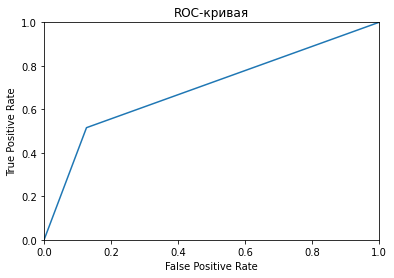

In [126]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 0.94, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    roc_auc = roc_auc_score(target_valid, predicted_valid)
    print('Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1-мера = {:.3f}, ROC_AUC = {:.3f}'.format(
        threshold, precision, recall, f1, roc_auc))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Порог = 0.00 | Точность = 0.203, Полнота = 0.997, F1-мера = 0.338, ROC_AUC = 0.532
Порог = 0.02 | Точность = 0.231, Полнота = 0.983, F1-мера = 0.374, ROC_AUC = 0.599
Порог = 0.04 | Точность = 0.258, Полнота = 0.966, F1-мера = 0.407, ROC_AUC = 0.651
Порог = 0.06 | Точность = 0.282, Полнота = 0.937, F1-мера = 0.434, ROC_AUC = 0.684
Порог = 0.08 | Точность = 0.302, Полнота = 0.906, F1-мера = 0.453, ROC_AUC = 0.702
Порог = 0.10 | Точность = 0.318, Полнота = 0.883, F1-мера = 0.467, ROC_AUC = 0.715
Порог = 0.12 | Точность = 0.342, Полнота = 0.860, F1-мера = 0.490, ROC_AUC = 0.733
Порог = 0.14 | Точность = 0.361, Полнота = 0.843, F1-мера = 0.506, ROC_AUC = 0.744
Порог = 0.16 | Точность = 0.378, Полнота = 0.826, F1-мера = 0.519, ROC_AUC = 0.751
Порог = 0.18 | Точность = 0.397, Полнота = 0.798, F1-мера = 0.530, ROC_AUC = 0.754
Порог = 0.20 | Точность = 0.418, Полнота = 0.769, F1-мера = 0.542, ROC_AUC = 0.757
Порог = 0.22 | Точность = 0.440, Полнота = 0.735, F1-мера = 0.550, ROC_AUC = 0.755
Поро

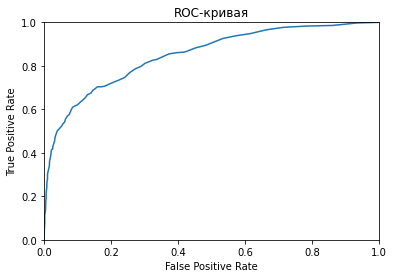

In [127]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 0.94, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    roc_auc = roc_auc_score(target_valid, predicted_valid)
    print('Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1-мера = {:.3f}, ROC_AUC = {:.3f}'.format(
        threshold, precision, recall, f1, roc_auc))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Порог = 0.00 | Точность = 0.193, Полнота = 1.000, F1-мера = 0.324, ROC_AUC = 0.500
Порог = 0.02 | Точность = 0.194, Полнота = 0.997, F1-мера = 0.325, ROC_AUC = 0.503
Порог = 0.04 | Точность = 0.204, Полнота = 0.997, F1-мера = 0.338, ROC_AUC = 0.533
Порог = 0.06 | Точность = 0.221, Полнота = 0.972, F1-мера = 0.360, ROC_AUC = 0.577
Порог = 0.08 | Точность = 0.239, Полнота = 0.940, F1-мера = 0.381, ROC_AUC = 0.612
Порог = 0.10 | Точность = 0.262, Полнота = 0.923, F1-мера = 0.408, ROC_AUC = 0.651
Порог = 0.12 | Точность = 0.283, Полнота = 0.889, F1-мера = 0.429, ROC_AUC = 0.675
Порог = 0.14 | Точность = 0.307, Полнота = 0.855, F1-мера = 0.451, ROC_AUC = 0.696
Порог = 0.16 | Точность = 0.335, Полнота = 0.829, F1-мера = 0.477, ROC_AUC = 0.718
Порог = 0.18 | Точность = 0.353, Полнота = 0.766, F1-мера = 0.484, ROC_AUC = 0.716
Порог = 0.20 | Точность = 0.378, Полнота = 0.729, F1-мера = 0.498, ROC_AUC = 0.721
Порог = 0.22 | Точность = 0.386, Полнота = 0.664, F1-мера = 0.488, ROC_AUC = 0.706
Поро

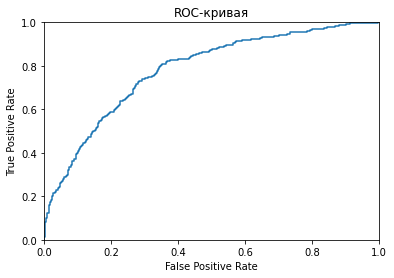

In [128]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 0.94, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    roc_auc = roc_auc_score(target_valid, predicted_valid)
    print('Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1-мера = {:.3f}, ROC_AUC = {:.3f}'.format(
        threshold, precision, recall, f1, roc_auc))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Лучшее значение F1-меры показывает модель Случайного леса при пороге в 0,38.

In [145]:
best_result = 0
best_depth = 0
for depth in range(1, 20):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    if f1 > best_result:
        best_result = f1
        best_depth = depth
display(f'Лучший результат F1-меры: {best_result}, лучший результат AUC-ROC: {auc_roc}, глубина: {best_depth}')

'Лучший результат F1-меры: 0.5825932504440496, лучший результат AUC-ROC: 0.7051922494701786, глубина: 16'

In [146]:
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 101, 10):
    for depth in range(1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        auc_roc = roc_auc_score(target_valid, predicted_valid)
        if f1 > best_result:
            best_result = f1
            best_est = est
            best_depth = depth
display(f'Лучший результат F1-меры: {best_result}, лучший результат AUC-ROC: {auc_roc}, количество деревьев: {best_est}, глубина: {best_depth}')

'Лучший результат F1-меры: 0.5876106194690265, лучший результат AUC-ROC: 0.7051922494701786, количество деревьев: 90, глубина: 16'

In [147]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, predicted_valid)
display(f'Лучший результат F1-меры: {f1}')
display(f'Значение AUC-меры, которое нам удалось добиться: {auc_roc}')

'Лучший результат F1-меры: 0.3175965665236052'

'Значение AUC-меры, которое нам удалось добиться: 0.5914485277564296'

### Мини-вывод
В этом этапе мы боролись с дисбалансом. Для этого мы использовали методы upsample и downsample. После анализа мы поняли, что лучше всего в этой борьбе справится метод upsample и модель случайного леса. После этого мы начали подбирать порог классификации, рисовать графики AUC-ROС и подбирать гиперпараметры для всех моделей и пришли к тому, что лучший результат показала модель случайного леса при количестве деревьев=90 и глубине=16, и пороге 0,38.

## Тестирование модели

In [149]:
model = DecisionTreeClassifier(random_state=12345, max_depth=16, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
f1 = f1_score(target_test, predicted_test)
auc_roc = roc_auc_score(target_valid, predicted_valid)
display(f'Значение F1-меры, которое нам удалось добиться: {f1}')
display(f'Значение AUC-меры, которое нам удалось добиться: {auc_roc}')

'Значение F1-меры, которое нам удалось добиться: 0.456140350877193'

'Значение AUC-меры, которое нам удалось добиться: 0.5914485277564296'

In [144]:
model = RandomForestClassifier(random_state=12345, n_estimators=90, max_depth=16)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
f1 = f1_score(target_test, predicted_test)
auc_roc = roc_auc_score(target_valid, predicted_valid)
display(f'Значение F1-меры, которое нам удалось добиться: {f1}')
display(f'Значение AUC-меры, которое нам удалось добиться: {auc_roc}')

'Значение F1-меры, которое нам удалось добиться: 0.6092896174863389'

'Значение AUC-меры, которое нам удалось добиться: 0.6833550695948516'

In [150]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
f1 = f1_score(target_test, predicted_test)
auc_roc = roc_auc_score(target_valid, predicted_valid)
display(f'Значение F1-меры, которое нам удалось добиться: {f1}')
display(f'Значение AUC-меры, которое нам удалось добиться: {auc_roc}')

'Значение F1-меры, которое нам удалось добиться: 0.509731232622799'

'Значение AUC-меры, которое нам удалось добиться: 0.5914485277564296'

# Вывод
Нам удалось достичь F1 более 0.59 и AUC-ROC= 0.68 у модели случайного леса. Значения остальных моделей оставляет желать лучшего.Хуже всего справилась модель решающего дерева и показала всего лишь F1=0,45, но значение AUC-ROC у логической регрессии и рещающего дерева,как не странно,равны.